In [2]:
import os
import pandas as pd
import glob
from tqdm import tqdm
from scipy.io import wavfile

from scipy import signal
import numpy as np
import soundfile as sf
os.chdir('../src/')
import config
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [23]:
sub12 = pd.read_csv(config.OUTPUT_FOLDER + 'stacker_xgb_15/sub_train.csv')
sub31 = pd.read_csv(config.OUTPUT_FOLDER + 'stacker_xgb_11/sub_train.csv')
sub31['target'] = sub31['target'].apply(lambda x: x if x in config.allowed_train_labels else "unknown")

sub31 = sub31['target'].value_counts().to_frame().reset_index()
sub31.columns = ['label', '31_labels']

sub12 = sub12['target'].value_counts().to_frame().reset_index()
sub12.columns = ['label', '12_labels']
# sub12['target'].rename(columns = {'target' : 'target_12_labels'}, inplace = True)
sub = sub31.merge(sub12, on = 'label')

In [24]:
sub

,label,31_labels,12_labels
0,unknown,40824,42016
1,off,2646,2325
2,on,2410,2286
3,up,2384,2315
4,go,2377,2301
5,stop,2374,2332
6,silence,2367,1966
7,no,2363,2325
8,yes,2348,2341
9,right,2346,2294


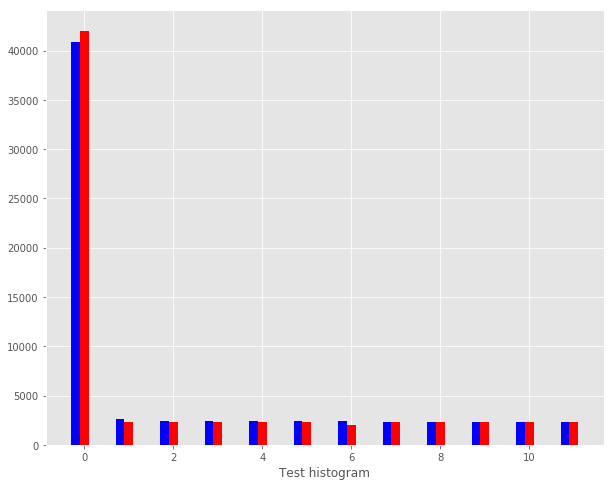

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#The data
indices = np.arange(len(sub))
width = 0.2

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.bar(indices-width,sub['31_labels'].values,width,color='b',label='31 labels')
ax.bar(indices,sub['12_labels'].values,width,color='r',label='12 labels')
ax.set_xlabel('Test histogram')
plt.show()